# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
DATASET_PATH = '/home/alberto/Desktop/datasets/histopathologic-cancer-detection'

In [6]:
labels = pd.read_csv(f'{DATASET_PATH}/train_labels.csv')
labels.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [7]:
import seaborn as sns

In [15]:
n_labels = labels.groupby('label').count().reset_index().rename(columns={'id': 'Number of Cases', 'label': 'Label'})
n_labels['Percentage'] = n_labels['Number of Cases'] / n_labels['Number of Cases'].sum() * 100.0

n_labels.head()

,Label,Number of Cases,Percentage
0,0,130908,59.496875
1,1,89117,40.503125


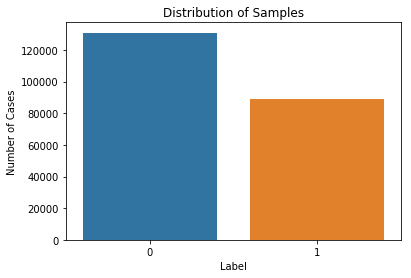

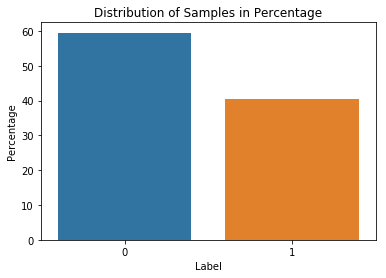

In [17]:
plt.title('Distribution of Samples')
sns.barplot(x='Label', y='Number of Cases', data=n_labels)
plt.show()

sns.barplot(x='Label', y='Percentage', data=n_labels)
plt.title('Distribution of Samples in Percentage')
plt.show()

In [19]:
from PIL import Image

def load_image_from_file(filename):
    return Image.open(filename)

def get_rgb_image_from_file(filename):
    return load_image_from_file(filename).convert('RGB')

In [31]:
def get_random_images(df_images):
    row = df_images.sample(1).squeeze()
    img = get_rgb_image_from_file(os.path.join(DATASET_PATH, 'train', ''.join([row['id'],'.tif'])))
    return img

In [49]:
def plot_four_random_images(df_images, class_=1):
    df_images_class = df_images.loc[df_images['label'] == class_]
    
    fig = plt.figure(figsize=(15,15))
    n_cols = 2
    n_rows = 2
    for i in range(1, 5):
        img = get_random_images(df_images=df_images_class)
        fig.add_subplot(n_rows, n_cols, i)
        plt.imshow(img)
    
    plt.savefig(f'./images/class={class_}.png', dpi=150)
    plt.show()
    

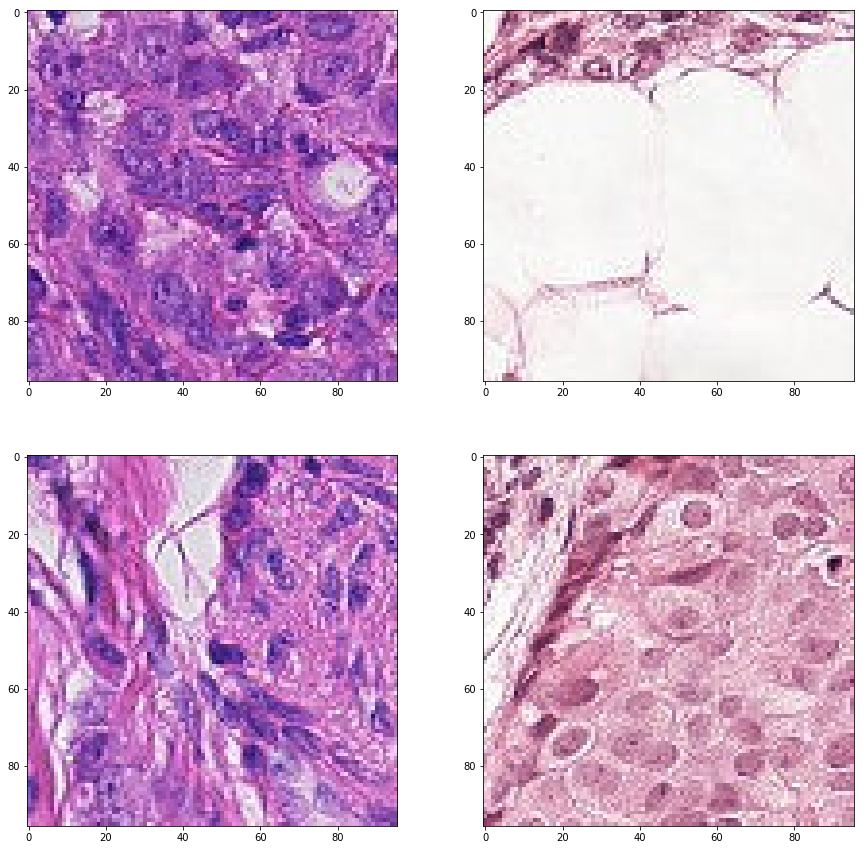

In [50]:
plot_four_random_images(df_images=labels, class_=1)

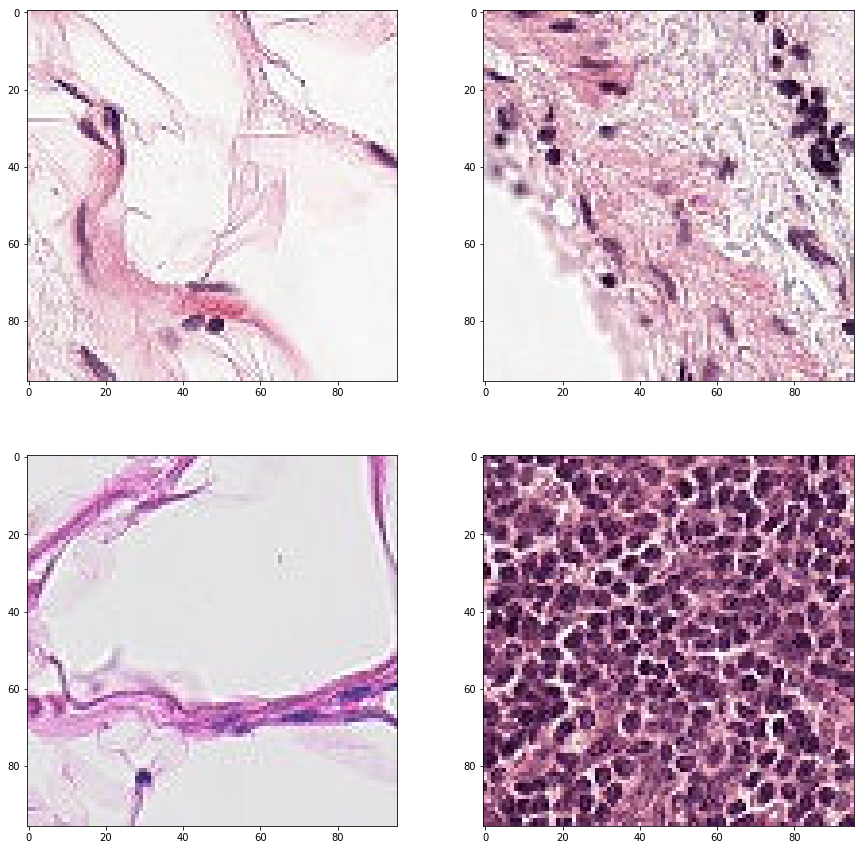

In [51]:
plot_four_random_images(df_images=labels, class_=0)